In [2]:
library(readxl)
library(dplyr)
dd_CI<-read_excel("C:\\Users\\RAZER\\Documents\\GitHub\\R_is_ON\\R_exercise_Data\\R_exercise\\stroke_CI.xlsx") 


In [ ]:
#그룹분리(group=1)
dd_g1<-dd_CI %>% filter(group==1)
dd_g1


group,ID,sex,age,smoking,drinking,exercise,meat_preference,seafood_preference,fastfood_preference,⋯,GPT,Chol,trigl,HDL,LDH,CK,FBS,Na,K,Cl
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P0239,1,63,2,2,2,2,2,5,⋯,28,169,153,42,416,109,144,140,3.9,107
1,P0125,1,64,3,1,2,2,2,5,⋯,29,263,238,37,485,209,77,144,4.3,104
1,P092,1,45,3,3,2,2,2,3,⋯,16,216,140,31,323,81,91,142,3.7,105
1,P102,2,77,1,2,2,3,3,4,⋯,10,262,137,29,421,34,92,140,3.8,101
1,P119,1,83,3,3,2,2,2,5,⋯,10,137,61,38,398,64,90,141,4.1,104
1,P0287,2,71,1,1,1,2,3,5,⋯,18,164,81,35,456,25,79,144,3.8,108
1,P200,2,62,1,1,2,4,3,4,⋯,11,200,141,33,442,78,102,142,3.7,104
1,P084,2,50,1,2,2,2,2,4,⋯,24,279,592,26,376,37,201,138,4.5,102
1,P087,1,50,3,1,2,2,1,4,⋯,19,178,107,26,297,74,82,142,4.3,105


In [ ]:
#등분산성검정
bartlett.test(Hct~factor(smoking), data=dd_g1)



	Bartlett test of homogeneity of variances

data:  Hct by factor(smoking)
Bartlett's K-squared = 8.2625, df = 2, p-value = 0.01606


In [ ]:
#ANOVA test
aov1<-aov(Hct~factor(smoking), data=dd_g1)
summary(aov1)  #F table


                 Df Sum Sq Mean Sq F value  Pr(>F)    
factor(smoking)   2    635   317.7   14.94 9.1e-07 ***
Residuals       197   4190    21.3                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [6]:

#잔차의 정규성검정
shapiro.test(aov1$residuals) 



	Shapiro-Wilk normality test

data:  aov1$residuals
W = 0.92127, p-value = 7.223e-09


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Hct ~ factor(smoking), data = dd_g1)

$`factor(smoking)`
        diff         lwr      upr     p adj
2-1 2.056892  0.03878798 4.074996 0.0446443
3-1 4.075940  2.30637604 5.845504 0.0000005
3-2 2.019048 -0.15050152 4.188597 0.0740397


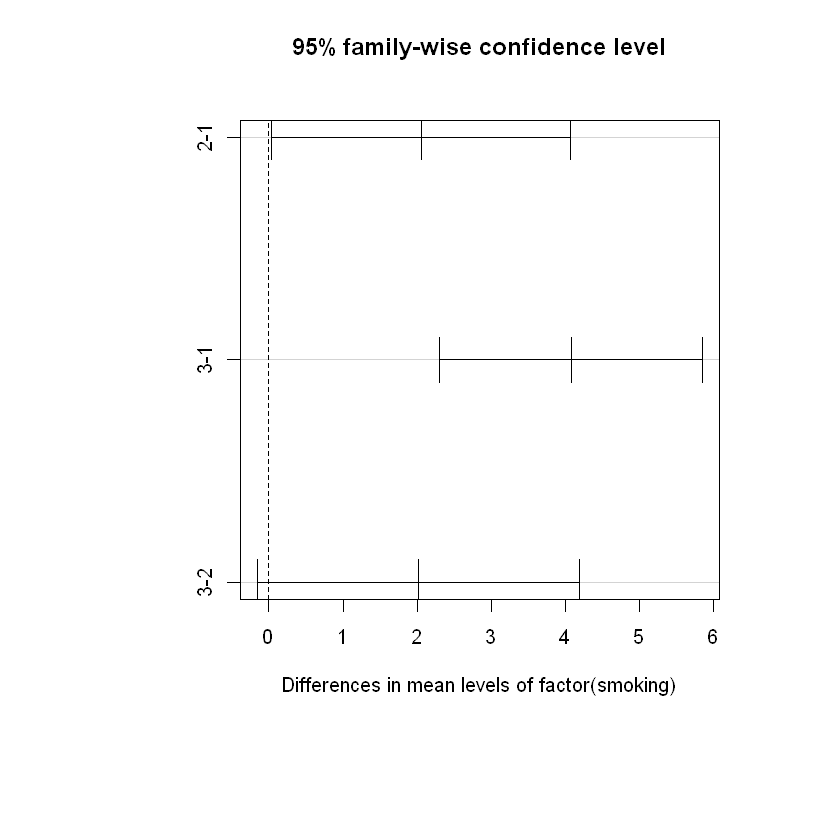

In [7]:
#사후분석
TukeyHSD(aov1) #multiple comparion (TukeyHSD)
par(las=0, mai=c(2,2,1,1))
plot(TukeyHSD(aov1))


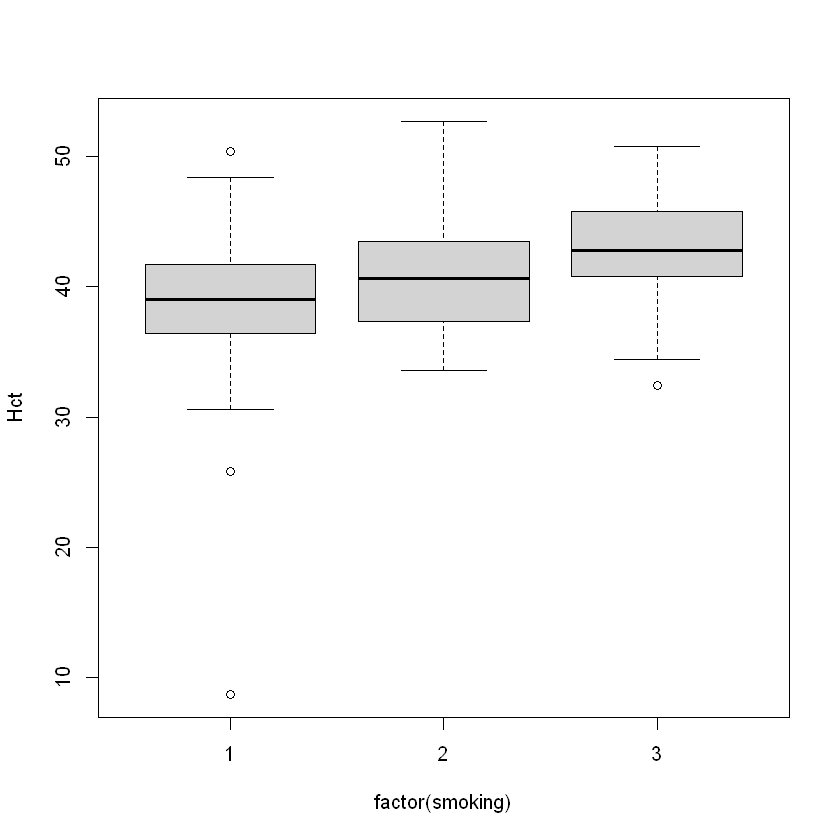

In [ ]:
boxplot(Hct~factor(smoking), data=dd_g1)


In [ ]:

#비모수 ANOVA 검정
kruskal.test(Hct~factor(smoking), data=dd_g1)



	Kruskal-Wallis rank sum test

data:  Hct by factor(smoking)
Kruskal-Wallis chi-squared = 30.137, df = 2, p-value = 2.857e-07


In [ ]:
#비모수검정(사후분석)
library(DescTools)
DunnTest(Hct~factor(smoking), data=dd_g1)
DunnTest(Hct~factor(smoking), data=dd_g1, method="bonferroni")


ERROR: Error in library(DescTools): there is no package called 'DescTools'


################################<br>
Data from a double-blind clinical trial investigating
a new treatment for rheumatoid arthritis.
################################<br>

In [11]:
install.packages("vcd") #Visualizing Categorical Data
library(vcd)
help(package="vcd")
?Arthritis #help(Arthritis) 


package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\RAZER\AppData\Local\Temp\RtmpCWxNsc\downloaded_packages


Loading required package: grid



Documentation for package 'vcd'


		Information on package 'vcd'

Description:

Package:            vcd
Version:            1.4-13
Title:              Visualizing Categorical Data
Authors@R:          c(person(given = "David", family = "Meyer", role =
                    c("aut", "cre"), email =
                    "David.Meyer@R-project.org", comment = c(ORCID =
                    "0000-0002-5196-3048")), person(given = "Achim",
                    family = "Zeileis", role = "aut", email =
                    "Achim.Zeileis@R-project.org", comment = c(ORCID =
                    "0000-0003-0918-3766")), person(given = "Kurt",
                    family = "Hornik", role = "aut", email =
                    "Kurt.Hornik@R-project.org", comment = c(ORCID =
                    "0000-0003-4198-9911")), person(given = "Florian",
                    family = "Gerber", role = "ctb"), person(given =
                    "Michael", family = "Friendly", role = "aut", email
                    = "

Arthritis                 package:vcd                  R Documentation

_A_r_t_h_r_i_t_i_s _T_r_e_a_t_m_e_n_t _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Data from Koch & Edwards (1988) from a double-blind clinical trial
     investigating a new treatment for rheumatoid arthritis.

_U_s_a_g_e:

     data("Arthritis")
     
_F_o_r_m_a_t:

     A data frame with 84 observations and 5 variables.

     ID patient ID.

     Treatment factor indicating treatment (Placebo, Treated).

     Sex factor indicating sex (Female, Male).

     Age age of patient.

     Improved ordered factor indicating treatment outcome (None, Some,
          Marked).

_S_o_u_r_c_e:

     Michael Friendly (2000), Visualizing Categorical Data:
     <http://euclid.psych.yorku.ca/ftp/sas/vcd/catdata/arthrit.sas>

_R_e_f_e_r_e_n_c_e_s:

     G. Koch & S. Edwards (1988), Clinical efficiency trials with
     categorical data.  In K. E. Peace (ed.), _Biopharmaceutical

In [ ]:
Arthritis


,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked
7,75,Treated,Male,59,None
8,39,Treated,Male,59,Marked
9,33,Treated,Male,63,None


In [ ]:
head(Arthritis)


,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked


In [ ]:
head(Arthritis,10)


,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked
7,75,Treated,Male,59,None
8,39,Treated,Male,59,Marked
9,33,Treated,Male,63,None


In [ ]:
tail(Arthritis) 


,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
79,67,Placebo,Female,65,Marked
80,32,Placebo,Female,66,None
81,42,Placebo,Female,66,None
82,15,Placebo,Female,66,Some
83,71,Placebo,Female,68,Some
84,1,Placebo,Female,74,Marked


In [ ]:
str(Arthritis) #data structure


'data.frame':	84 obs. of  5 variables:
 $ ID       : int  57 46 77 17 36 23 75 39 33 55 ...
 $ Treatment: Factor w/ 2 levels "Placebo","Treated": 2 2 2 2 2 2 2 2 2 2 ...
 $ Sex      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age      : int  27 29 30 32 46 58 59 59 63 63 ...
 $ Improved : Ord.factor w/ 3 levels "None"<"Some"<..: 2 1 1 3 3 3 1 3 1 1 ...


In [ ]:
names(Arthritis)


[1] "ID"        "Treatment" "Sex"       "Age"       "Improved"

In [18]:
colnames(Arthritis)


[1] "ID"        "Treatment" "Sex"       "Age"       "Improved"

In [ ]:
class(Arthritis)  #types of data


[1] "data.frame"

In [ ]:
dim(Arthritis)   #number of case and variables (column)


[1] 84  5

In [ ]:
length(Arthritis) #number of variables (column)


[1] 5

In [ ]:
length(Arthritis$Sex)


[1] 84

#######################################
# Frequency and contigency tables
#######################################

In [23]:
attach(Arthritis)


In [24]:
#Create frequency tables
mytable<-table(Improved)


In [ ]:
mytable


Improved
  None   Some Marked 
    42     14     28 

In [ ]:
mytable2<-table(Treatment,Improved)
mytable2


         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

In [27]:
#Convert frequency table to proportions
options(digits=3)
prop.table(mytable)
prop.table(mytable)*100


Improved
  None   Some Marked 
 0.500  0.167  0.333 

Improved
  None   Some Marked 
  50.0   16.7   33.3 

In [ ]:
#Create contingency table using xtabs()
mytable<-xtabs(~Treatment+Improved,data=Arthritis) #Create a contingency table
mytable
prop.table(mytable)


         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

         Improved
Treatment   None   Some Marked
  Placebo 0.3452 0.0833 0.0833
  Treated 0.1548 0.0833 0.2500

In [29]:
addmargins(mytable)
addmargins(prop.table(mytable))


,None,Some,Marked,Sum
Placebo,29,7,7,43
Treated,13,7,21,41
Sum,42,14,28,84


,None,Some,Marked,Sum
Placebo,0.345,0.0833,0.0833,0.512
Treated,0.155,0.0833,0.2500,0.488
Sum,0.500,0.1667,0.3333,1.000


In [30]:
#Three-way contingency table
mytable<-xtabs(~Treatment+Sex+Improved,data=Arthritis)
mytable


, , Improved = None

         Sex
Treatment Female Male
  Placebo     19   10
  Treated      6    7

, , Improved = Some

         Sex
Treatment Female Male
  Placebo      7    0
  Treated      5    2

, , Improved = Marked

         Sex
Treatment Female Male
  Placebo      6    1
  Treated     16    5


In [ ]:
#Summarize margins for specific variables 
margin.table(mytable,1)
margin.table(mytable,2)
margin.table(mytable,3)
margin.table(mytable,c(1,3))


Treatment
Placebo Treated 
     43      41 

Sex
Female   Male 
    59     25 

Improved
  None   Some Marked 
    42     14     28 

         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

In [32]:
ftable(mytable) #Create ‘flat’ contingency tables.


                 Improved None Some Marked
Treatment Sex                             
Placebo   Female            19    7      6
          Male              10    0      1
Treated   Female             6    5     16
          Male               7    2      5

In [ ]:
ftable(addmargins(mytable))


                 Improved None Some Marked Sum
Treatment Sex                                 
Placebo   Female            19    7      6  32
          Male              10    0      1  11
          Sum               29    7      7  43
Treated   Female             6    5     16  27
          Male               7    2      5  14
          Sum               13    7     21  41
Sum       Female            25   12     22  59
          Male              17    2      6  25
          Sum               42   14     28  84

In [ ]:
ftable(prop.table(mytable),c(1,2))


                 Improved   None   Some Marked
Treatment Sex                                 
Placebo   Female          0.2262 0.0833 0.0714
          Male            0.1190 0.0000 0.0119
Treated   Female          0.0714 0.0595 0.1905
          Male            0.0833 0.0238 0.0595

In [ ]:
ftable(addmargins(prop.table(mytable,c(1,2)),3))


                 Improved   None   Some Marked    Sum
Treatment Sex                                        
Placebo   Female          0.5938 0.2188 0.1875 1.0000
          Male            0.9091 0.0000 0.0909 1.0000
Treated   Female          0.2222 0.1852 0.5926 1.0000
          Male            0.5000 0.1429 0.3571 1.0000

In [ ]:
#Improved proportions for treatment*sex
#In general, the proportions will add to 1 over the indices not inculded in the prop.table() call(the third index, or Improvement in this case.)
ftable(addmargins(prop.table(mytable,c(1,2)),3))*100


                 Improved   None   Some Marked    Sum
Treatment Sex                                        
Placebo   Female           59.38  21.88  18.75 100.00
          Male             90.91   0.00   9.09 100.00
Treated   Female           22.22  18.52  59.26 100.00
          Male             50.00  14.29  35.71 100.00

###############################
# test of independence: Chi-squared test
###############################

In [37]:
options(digits=5)
mytable<-xtabs(~Treatment+Improved,data=Arthritis)
mytable


         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

In [38]:
chisq.test(mytable)



	Pearson's Chi-squared test

data:  mytable
X-squared = 13.1, df = 2, p-value = 0.0015


#################################
# Another example: Improved vs Sex
#################################

In [ ]:
mytable2<-xtabs(~Improved+Sex,data=Arthritis)
mytable2


        Sex
Improved Female Male
  None       25   17
  Some       12    2
  Marked     22    6

In [40]:
chisq.test(mytable2)
chisq.test(mytable2)$expected  # Check expected frequencies


Warning message in chisq.test(mytable2):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  mytable2
X-squared = 4.84, df = 2, p-value = 0.089


Warning message in chisq.test(mytable2):
"Chi-squared approximation may be incorrect"


,Female,Male
None,29.5000,12.5000
Some,9.8333,4.1667
Marked,19.6667,8.3333


In [41]:
#Fisher's exact test when cells have expected values smaller than five
fisher.test(mytable2)



	Fisher's Exact Test for Count Data

data:  mytable2
p-value = 0.11
alternative hypothesis: two.sided


In [42]:
#measures of association
mytable
chisq.test(mytable)
assocstats(mytable) # Measure of association (effect size)


         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21


	Pearson's Chi-squared test

data:  mytable
X-squared = 13.1, df = 2, p-value = 0.0015


                    X^2 df  P(> X^2)
Likelihood Ratio 13.530  2 0.0011536
Pearson          13.055  2 0.0014626

Phi-Coefficient   : NA 
Contingency Coeff.: 0.367 
Cramer's V        : 0.394 

In [ ]:
#Cochran-Mantel-Haenzel chi-square test
mytable3<-xtabs(~Treatment+Improved+Sex,data=Arthritis)
mytable3
mantelhaen.test(mytable3)


, , Sex = Female

         Improved
Treatment None Some Marked
  Placebo   19    7      6
  Treated    6    5     16

, , Sex = Male

         Improved
Treatment None Some Marked
  Placebo   10    0      1
  Treated    7    2      5



	Cochran-Mantel-Haenszel test

data:  mytable3
Cochran-Mantel-Haenszel M^2 = 14.6, df = 2, p-value = 0.00066


In [ ]:
#McNemar test Example 1 (paired categorical data)
copy<-matrix(c(45,17,4,34), ncol=2)
copy


45,4
17,34


In [ ]:
mcnemar.test(copy)
mcnemar.test(matrix(c(45,17,4,34), ncol=2))



	McNemar's Chi-squared test with continuity correction

data:  copy
McNemar's chi-squared = 6.86, df = 1, p-value = 0.0088



	McNemar's Chi-squared test with continuity correction

data:  matrix(c(45, 17, 4, 34), ncol = 2)
McNemar's chi-squared = 6.86, df = 1, p-value = 0.0088


In [ ]:
result<-mcnemar.test(matrix(c(45,17,4,34), ncol=2))


In [ ]:
# McNemar Test Example 2
satisfy<-matrix(c(20,15,20,30), ncol=2)
satisfy


20,20
15,30


In [ ]:
mcnemar.test(satisfy)
mcnemar.test(matrix(c(20,15,20,30), ncol=2))



	McNemar's Chi-squared test with continuity correction

data:  satisfy
McNemar's chi-squared = 0.457, df = 1, p-value = 0.5



	McNemar's Chi-squared test with continuity correction

data:  matrix(c(20, 15, 20, 30), ncol = 2)
McNemar's chi-squared = 0.457, df = 1, p-value = 0.5


In [ ]:
# Example paired contingency table (Before vs. After)
data <- matrix(c(40, 10, 20, 30), ncol=2, byrow=TRUE)
colnames(data) <- c("After_Positive", "After_Negative")
rownames(data) <- c("Before_Positive", "Before_Negative")
data <- as.table(data)


In [ ]:
print(data) 


                After_Positive After_Negative
Before_Positive             40             10
Before_Negative             20             30


In [52]:
# McNemar test
result <- mcnemar.test(data)
result



	McNemar's Chi-squared test with continuity correction

data:  data
McNemar's chi-squared = 2.7, df = 1, p-value = 0.1


################################
# Correlation Analysis (continuous variables)
################################

In [53]:
dd_CI 
library(dplyr)
library(ggplot2)


group,ID,sex,age,smoking,drinking,exercise,meat_preference,seafood_preference,fastfood_preference,⋯,GPT,Chol,trigl,HDL,LDH,CK,FBS,Na,K,Cl
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P0239,1,63,2,2,2,2,2,5,⋯,28,169,153,42,416,109,144,140,3.9,107
1,P0125,1,64,3,1,2,2,2,5,⋯,29,263,238,37,485,209,77,144,4.3,104
1,P092,1,45,3,3,2,2,2,3,⋯,16,216,140,31,323,81,91,142,3.7,105
1,P102,2,77,1,2,2,3,3,4,⋯,10,262,137,29,421,34,92,140,3.8,101
1,P119,1,83,3,3,2,2,2,5,⋯,10,137,61,38,398,64,90,141,4.1,104
1,P0287,2,71,1,1,1,2,3,5,⋯,18,164,81,35,456,25,79,144,3.8,108
1,P200,2,62,1,1,2,4,3,4,⋯,11,200,141,33,442,78,102,142,3.7,104
1,P084,2,50,1,2,2,2,2,4,⋯,24,279,592,26,376,37,201,138,4.5,102
1,P087,1,50,3,1,2,2,1,4,⋯,19,178,107,26,297,74,82,142,4.3,105


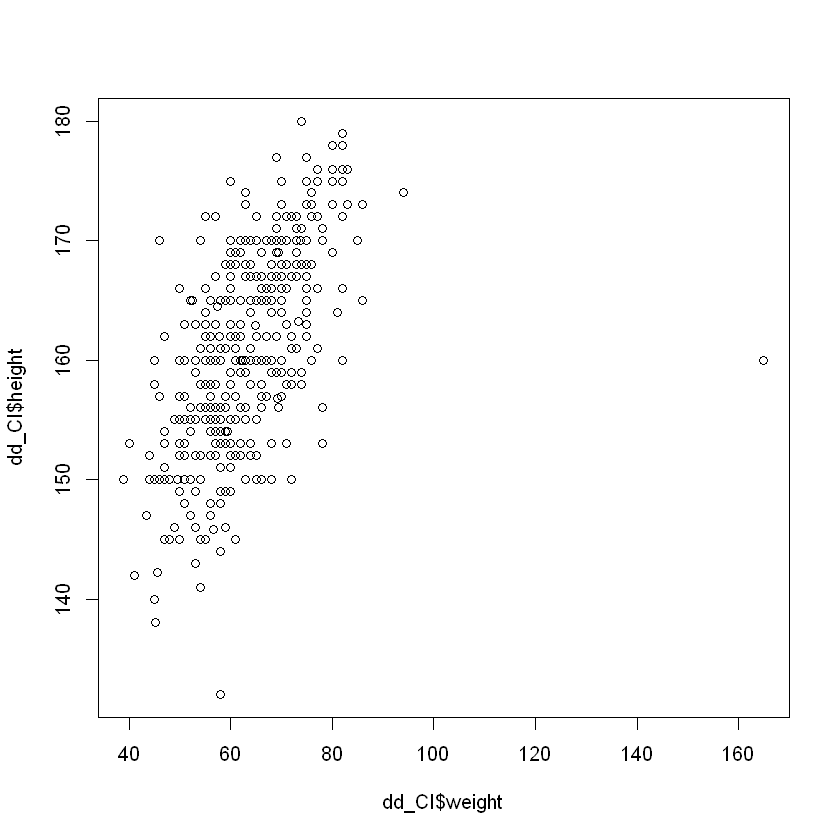

In [ ]:
# Scatter plot
plot(dd_CI$weight, dd_CI$height)


`geom_smooth()` using formula = 'y ~ x'


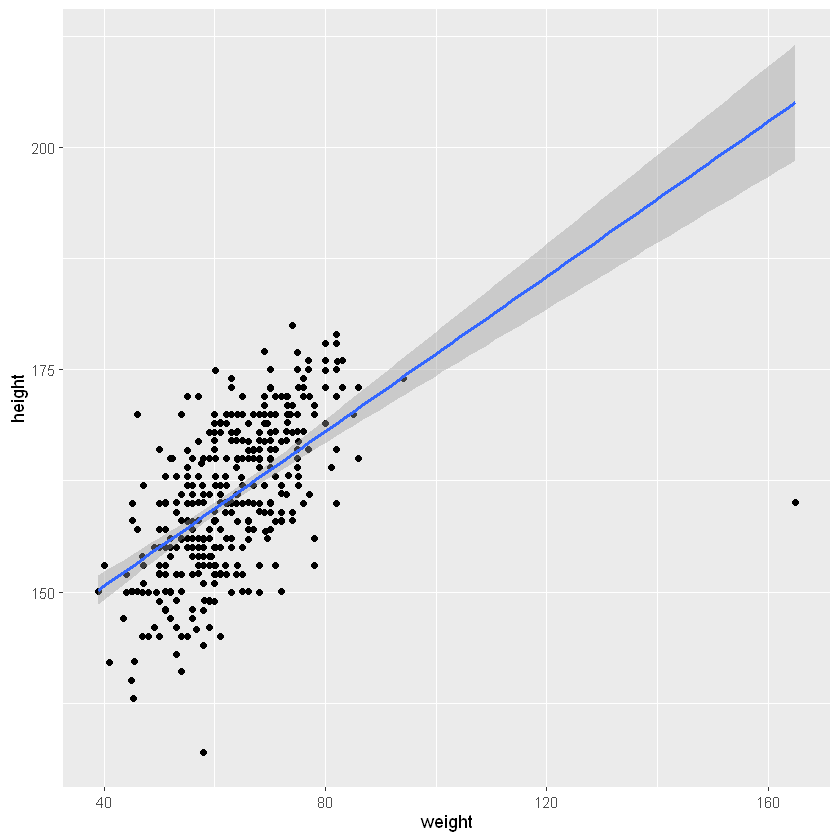

In [55]:
dd_CI %>% 
  ggplot(aes(weight, height)) + 
  geom_jitter() + 
  geom_smooth(method = "lm")   # Scatter plot with regression line


In [60]:
# Correlation computation
cor(dd_CI$weight, dd_CI$height)



[1] 0.56138

In [61]:
cor.test(dd_CI$weight, dd_CI$height)



	Pearson's product-moment correlation

data:  dd_CI$weight and dd_CI$height
t = 13.5, df = 398, p-value <2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.49031 0.62502
sample estimates:
    cor 
0.56138 


In [62]:
cor.test(dd_CI$weight, dd_CI$height , method = "spearman")


Warning message in cor.test.default(dd_CI$weight, dd_CI$height, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  dd_CI$weight and dd_CI$height
S = 3965117, p-value <2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
    rho 
0.62827 
